# PyShop Session 4
##Exercises
***
These exercises will give you the chance to practice downloading a csv file using requests and dealing with the data in that file using Pandas.

Should you struggle with the download of the data, the data file is included in the folder for your convenience.

The questions are in increasing difficulty, where the first question should take you less than a minute and the last one you might not be able to figure out.  Good luck!

**Note:** I appologize for the solutions and questions not being next to each other, but there is a numbering issue in the Markdown that generates this text.  Sorry, but it is a known bug that has yet to be fixed!

1. Use the requests package to download the two data files at the following URL's: http://www.stern.nyu.edu/~wgreene/Text/Edition7/TableF1-1.csv http://www.stern.nyu.edu/~wgreene/Text/Edition7/TableF3-1.csv.  You should have to requests objects containing the pages.
2. Use `BytesIO` and Pandas to read in the csv data to two seperate data frames.
3. Use `head`, `tail`, `describe`, `shape`, and any other methods you find interesting to learn more about your data sets.
4. Use `join` and `merge` to do an inner join of the two data frames, keeping only years that appear in both data sets. **NOTE:** These two will do the same thing, it's just for practice.  If you struggle with `join` don't forget about the index!
5. Check the dimensions of all four data frames to ensure the proper shape.
6. Use the `map` function to make all the column headers lower case and to strip white space from the left and right.  **NOTE:** To see why this is necessary, print the column names.  There are extra spaces!
7. Use the `shift` method to create a lagged value for capital to labor ratio `k`.  Given this, generate a column of first differences in `k`.
8. Use `groupby` to generate average values of all variables during and outside of war (ie when `w` is 1 or 0 respectively).
9. Use `merge` to add a column for average technology level during war time and during peace time to your data frame, then create a column for technology deviation from the mean.
10. Install seaborn using either `conda install seaborn` or `pip install seaborn`.  **NOTE:** Apparently the pip version is more up to date.
11. Use seaborn to generate a `pairplot` of your data, just to take a look.  With so few observations, we can't say much... **NOTE:** If you get an error like `AttributeError: max must be larger than min in range parameter.`, it is probably caused by the `Nan` in the lag.  Come up with some way to deal with this!
12. If you complete this and still want some more, use statsmodels to generate regression coefficients of Q (output) on all of the variables (or just the ones you want).  Clearly the sample is too small, but it's good practice!

In [89]:
import requests
import numpy as np
import pandas as pd
from io import BytesIO
import seaborn as sns

%matplotlib inline

In [32]:
c = requests.Session()
URL = 'http://www.stern.nyu.edu/~wgreene/Text/Edition7/TableF2-1.csv'
page = c.get(URL)
c = requests.Session()
URL = 'http://www.stern.nyu.edu/~wgreene/Text/Edition7/TableF6-4.csv'
page2 = c.get(URL)

In [33]:
data1 = pd.read_csv(BytesIO(page.content))
data2 = pd.read_csv(BytesIO(page2.content))

In [34]:
data1.head()

,YEAR,X,C,W
0,1940,241,226,0
1,1941,280,240,0
2,1942,319,235,1
3,1943,331,245,1
4,1944,345,255,1


In [35]:
data2.head()

,YEAR,Q,K,A
0,1909,0.623,2.06,1.000
1,1910,0.616,2.10,0.983
2,1911,0.647,2.17,1.021
3,1912,0.652,2.21,1.023
4,1913,0.680,2.23,1.064


In [36]:
data1.tail()

,YEAR,X,C,W
6,1946,332,295,0
7,1947,320,300,0
8,1948,339,305,0
9,1949,338,315,0
10,1950,371,325,0


In [37]:
data2.tail()

,YEAR,Q,K,A
36,1945,1.296,2.66,1.850
37,1946,1.215,2.50,1.769
38,1947,1.194,2.50,1.739
39,1948,1.221,2.55,1.767
40,1949,1.275,2.70,1.809


In [38]:
data1.describe()

,YEAR,X,C,W
count,11.000000,11.000000,11.000000,11.000000
mean,1945.000000,323.272727,273.272727,0.363636
std,3.316625,35.071615,35.522080,0.504525
min,1940.000000,241.000000,226.000000,0.000000
25%,1942.500000,319.500000,242.500000,0.000000
50%,1945.000000,332.000000,265.000000,0.000000
75%,1947.500000,339.500000,302.500000,1.000000
max,1950.000000,371.000000,325.000000,1.000000


In [39]:
data2.describe()

,YEAR,Q,K,A
count,41.000000,41.000000,41.000000,41.000000
mean,1929.000000,0.905317,2.631463,1.324244
std,11.979149,0.201472,0.329815,0.267492
min,1909.000000,0.616000,2.060000,0.983000
25%,1919.000000,0.729000,2.470000,1.142000
50%,1929.000000,0.874000,2.630000,1.226000
75%,1939.000000,1.034000,2.810000,1.514000
max,1949.000000,1.296000,3.330000,1.850000


In [40]:
merged = pd.merge(data1, data2, how="inner", on='YEAR')
print(data1.shape, data2.shape, merged.shape)
merged.head()

(11, 4) (41, 4) (10, 7)


,YEAR,X,C,W,Q,K,A
0,1940,241,226,0,1.082,2.63,1.590
1,1941,280,240,0,1.122,2.58,1.660
2,1942,319,235,1,1.136,2.64,1.665
3,1943,331,245,1,1.180,2.62,1.692
4,1944,345,255,1,1.265,2.63,1.812


In [46]:
# NOTE: Join requires the index to be defined, so set the index for both frames
joined = data1.set_index('YEAR').join(data2.set_index('YEAR'), how="inner")
print(data1.shape, data2.shape, joined.shape)
joined.head()

(11, 4) (41, 4) (10, 6)


,X,C,W,Q,K,A
YEAR,,,,,,
1940,241,226,0,1.082,2.63,1.590
1941,280,240,0,1.122,2.58,1.660
1942,319,235,1,1.136,2.64,1.665
1943,331,245,1,1.180,2.62,1.692
1944,345,255,1,1.265,2.63,1.812


In [58]:
merged.columns = map(str.lower, merged.columns)
merged.columns = map(str.lstrip, merged.columns)
merged.columns = map(str.rstrip, merged.columns)
print(merged.columns)

Index(['year', 'x', 'c', 'w', 'q', 'k', 'a', 'lagged_k', 'diff_k'], dtype='object')


In [51]:
merged['lagged_k'] = merged['k'].shift()
merged.head()

,year,x,c,w,q,k,a,lagged_k
0,1940,241,226,0,1.082,2.63,1.590,NaN
1,1941,280,240,0,1.122,2.58,1.660,2.63
2,1942,319,235,1,1.136,2.64,1.665,2.58
3,1943,331,245,1,1.180,2.62,1.692,2.64
4,1944,345,255,1,1.265,2.63,1.812,2.62


In [54]:
merged['diff_k'] = merged['k'] - merged['lagged_k']
merged.head()

,year,x,c,w,q,k,a,lagged_k,diff_k
0,1940,241,226,0,1.082,2.63,1.590,NaN,NaN
1,1941,280,240,0,1.122,2.58,1.660,2.63,-0.05
2,1942,319,235,1,1.136,2.64,1.665,2.58,0.06
3,1943,331,245,1,1.180,2.62,1.692,2.64,-0.02
4,1944,345,255,1,1.265,2.63,1.812,2.62,0.01


In [60]:
grouped = merged.groupby('w')

In [64]:
grouped.aggregate(np.mean)

,year,x,c,q,k,a,lagged_k,diff_k
w,,,,,,,,
0,1945.166667,308.333333,280.166667,1.184833,2.576667,1.722333,2.5680,-0.002
1,1943.500000,333.750000,250.000000,1.219250,2.637500,1.754750,2.6175,0.020


In [78]:
means = grouped['a'].aggregate(np.mean).reset_index()
means.columns = ['w', 'a_w']

In [80]:
merged1 = pd.merge(merged, means, how="left", on="w")
merged1

,year,x,c,w,q,k,a,lagged_k,diff_k,a_w
0,1940,241,226,0,1.082,2.63,1.590,NaN,NaN,1.722333
1,1941,280,240,0,1.122,2.58,1.660,2.63,-0.05,1.722333
2,1942,319,235,1,1.136,2.64,1.665,2.58,0.06,1.754750
3,1943,331,245,1,1.180,2.62,1.692,2.64,-0.02,1.754750
4,1944,345,255,1,1.265,2.63,1.812,2.62,0.01,1.754750
5,1945,340,265,1,1.296,2.66,1.850,2.63,0.03,1.754750
6,1946,332,295,0,1.215,2.50,1.769,2.66,-0.16,1.722333
7,1947,320,300,0,1.194,2.50,1.739,2.50,0.00,1.722333
8,1948,339,305,0,1.221,2.55,1.767,2.50,0.05,1.722333
9,1949,338,315,0,1.275,2.70,1.809,2.55,0.15,1.722333


In [84]:
merged1['a_dev'] = merged1['a'] - merged1['a_w']
merged1

,year,x,c,w,q,k,a,lagged_k,diff_k,a_w,a_dev
0,1940,241,226,0,1.082,2.63,1.590,NaN,NaN,1.722333,-0.132333
1,1941,280,240,0,1.122,2.58,1.660,2.63,-0.05,1.722333,-0.062333
2,1942,319,235,1,1.136,2.64,1.665,2.58,0.06,1.754750,-0.089750
3,1943,331,245,1,1.180,2.62,1.692,2.64,-0.02,1.754750,-0.062750
4,1944,345,255,1,1.265,2.63,1.812,2.62,0.01,1.754750,0.057250
5,1945,340,265,1,1.296,2.66,1.850,2.63,0.03,1.754750,0.095250
6,1946,332,295,0,1.215,2.50,1.769,2.66,-0.16,1.722333,0.046667
7,1947,320,300,0,1.194,2.50,1.739,2.50,0.00,1.722333,0.016667
8,1948,339,305,0,1.221,2.55,1.767,2.50,0.05,1.722333,0.044667
9,1949,338,315,0,1.275,2.70,1.809,2.55,0.15,1.722333,0.086667


/home/tmabbot/anaconda/envs/snakes/lib/python3.3/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


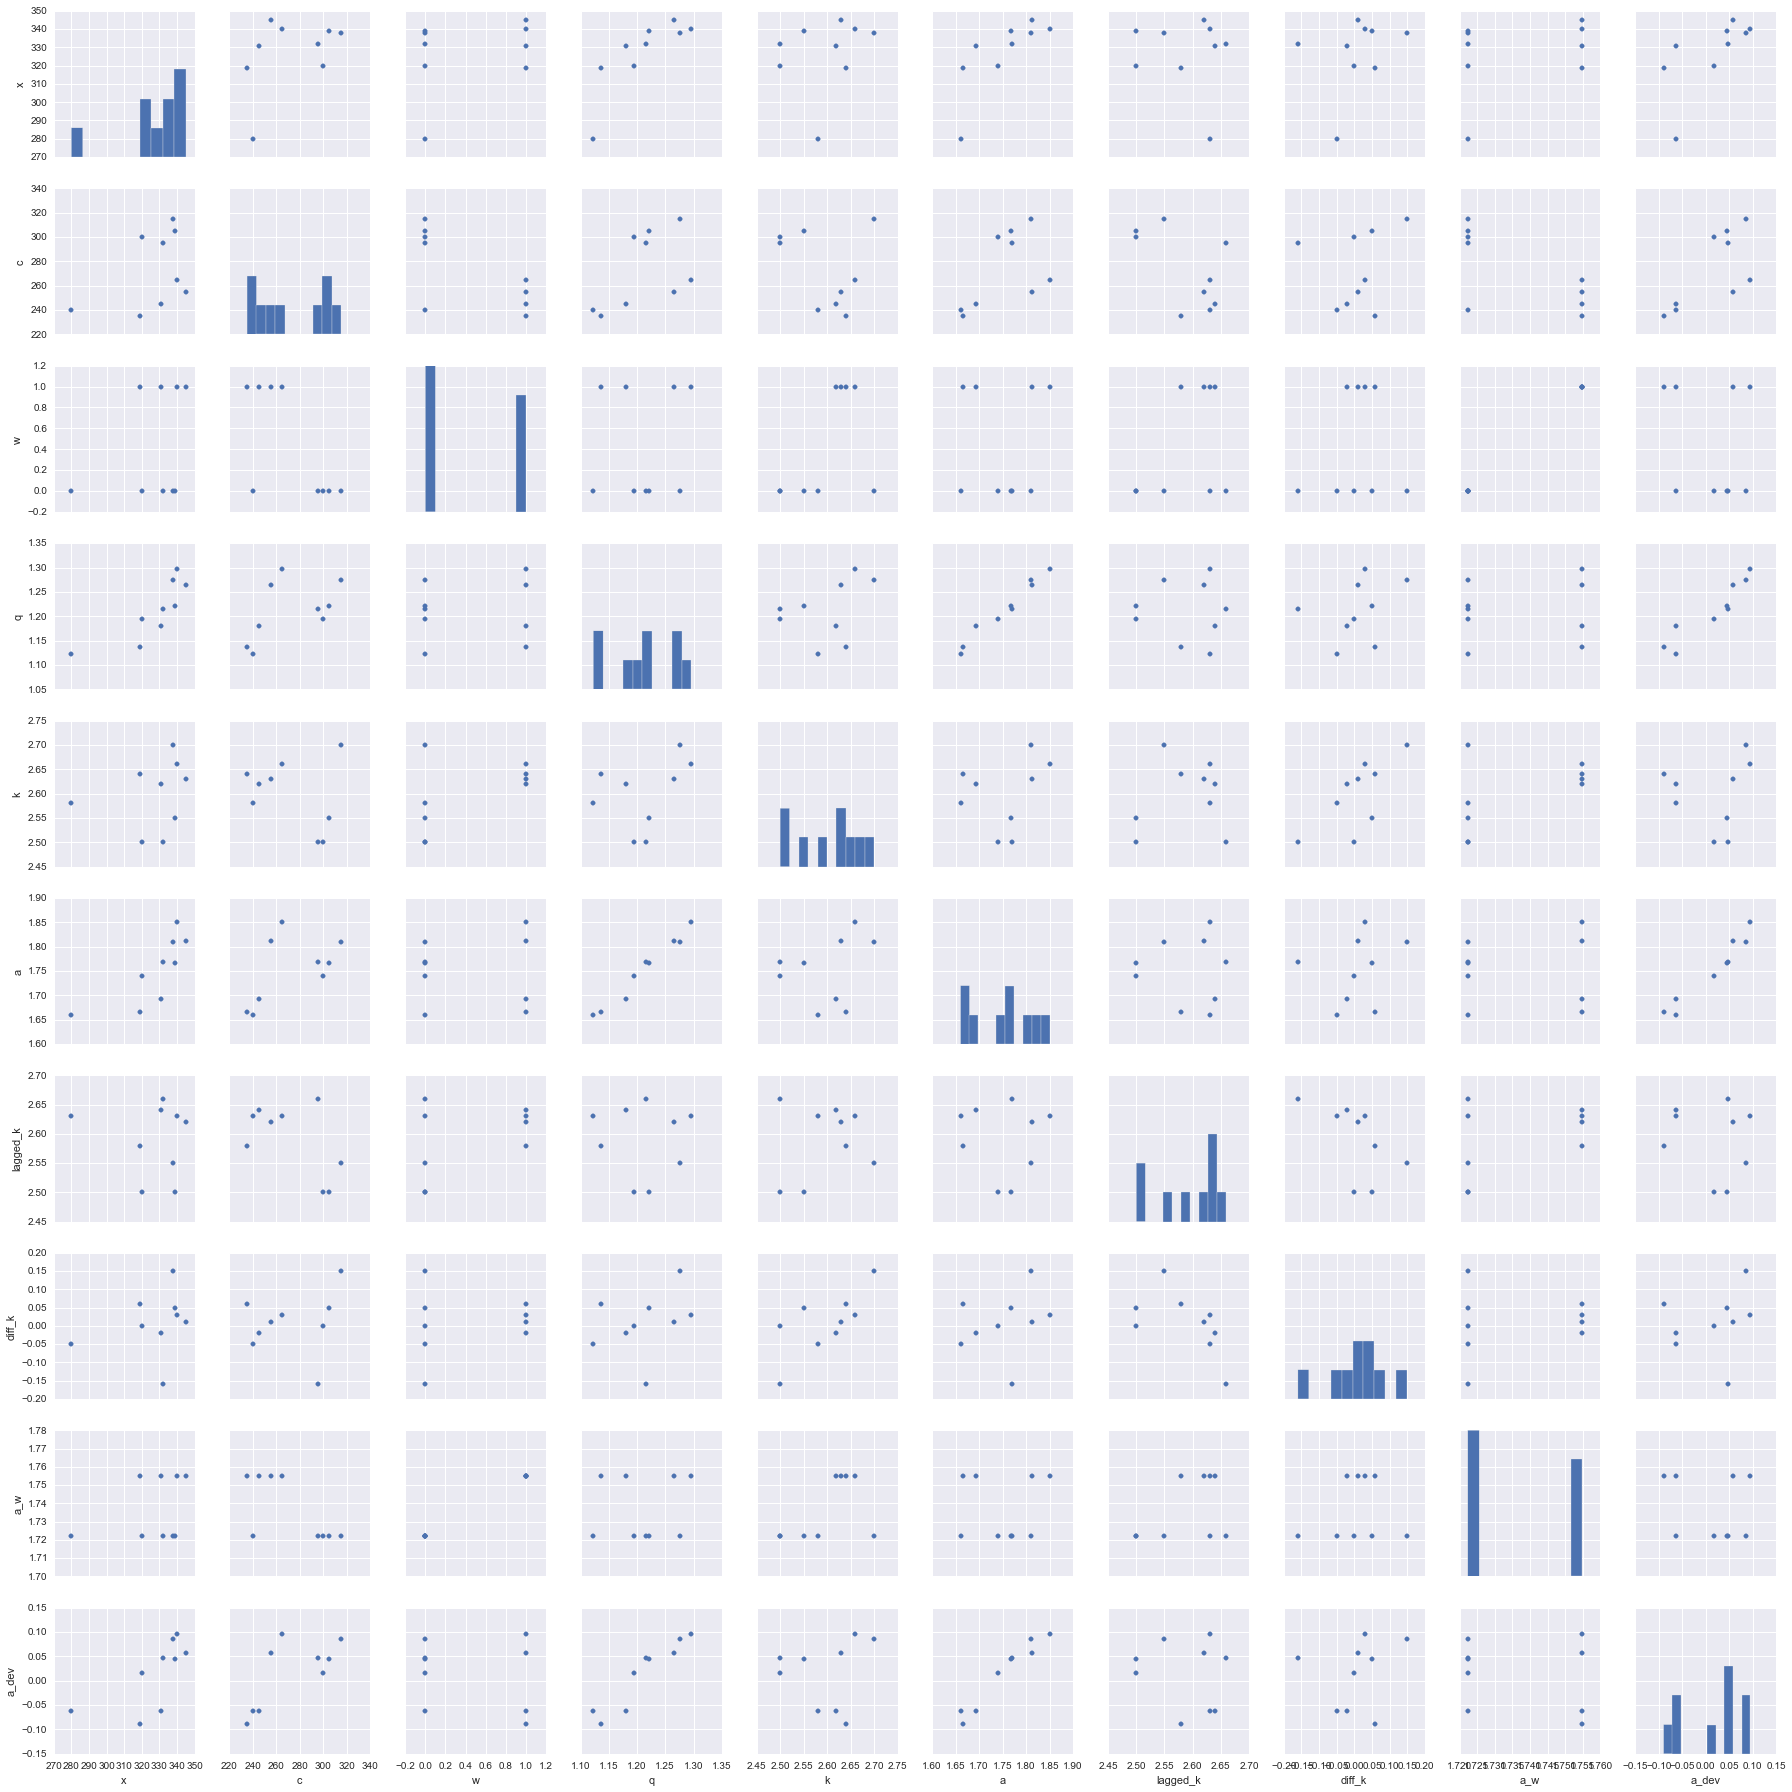

In [90]:
sns.pairplot(merged1.set_index('year').dropna())